# LazyPredict for Regression

In [2]:
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Imports
import tensorflow as tf
import os
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
import numpy as np
import lazypredict

## Set random seed for reproducibility

In [2]:
SEED = 64

#torch.backends.cudnn.deterministic = True
#torch.backends.cudnn.benchmark = False
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Data Loading

In [3]:
# Only modify this
file_name = "boston"

In [4]:
df = pd.read_csv(f'../../Data/Regression/{file_name}.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0,0.57,6.59,69.10,2.48,1,273.00,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0,0.57,6.12,76.70,2.29,1,273.00,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0,0.57,6.98,91.00,2.17,1,273.00,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0,0.57,6.79,89.30,2.39,1,273.00,21.00,393.45,6.48,22.00


In [5]:
df.shape

(506, 14)

In [6]:
# Display the first few rows of the dataframe
print(df.head())

# Display the dataframe's information (column types, non-null values, etc.)
print(df.info())

# Get the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

   CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  0.01 18.00   2.31     0 0.54 6.58 65.20 4.09    1 296.00    15.30 396.90   
1  0.03  0.00   7.07     0 0.47 6.42 78.90 4.97    2 242.00    17.80 396.90   
2  0.03  0.00   7.07     0 0.47 7.18 61.10 4.97    2 242.00    17.80 392.83   
3  0.03  0.00   2.18     0 0.46 7.00 45.80 6.06    3 222.00    18.70 394.63   
4  0.07  0.00   2.18     0 0.46 7.15 54.20 6.06    3 222.00    18.70 396.90   

   LSTAT  MEDV  
0   4.98 24.00  
1   9.14 21.60  
2   4.03 34.70  
3   2.94 33.40  
4   5.33 36.20  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      

In [7]:
# Summary statistics for numerical columns
print(df.describe())

# For categorical columns if any
#print(df.describe(include='object'))

        CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
count 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00   
mean    3.61  11.36  11.14   0.07   0.55   6.28  68.57   3.80   9.55 408.24   
std     8.60  23.32   6.86   0.25   0.12   0.70  28.15   2.11   8.71 168.54   
min     0.01   0.00   0.46   0.00   0.39   3.56   2.90   1.13   1.00 187.00   
25%     0.08   0.00   5.19   0.00   0.45   5.89  45.02   2.10   4.00 279.00   
50%     0.26   0.00   9.69   0.00   0.54   6.21  77.50   3.21   5.00 330.00   
75%     3.68  12.50  18.10   0.00   0.62   6.62  94.07   5.19  24.00 666.00   
max    88.98 100.00  27.74   1.00   0.87   8.78 100.00  12.13  24.00 711.00   

       PTRATIO      B  LSTAT   MEDV  
count   506.00 506.00 506.00 506.00  
mean     18.46 356.67  12.65  22.53  
std       2.16  91.29   7.14   9.20  
min      12.60   0.32   1.73   5.00  
25%      17.40 375.38   6.95  17.02  
50%      19.05 391.44  11.36  21.20  
75%      20.20 396.23 

In [8]:
# Check for missing values
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


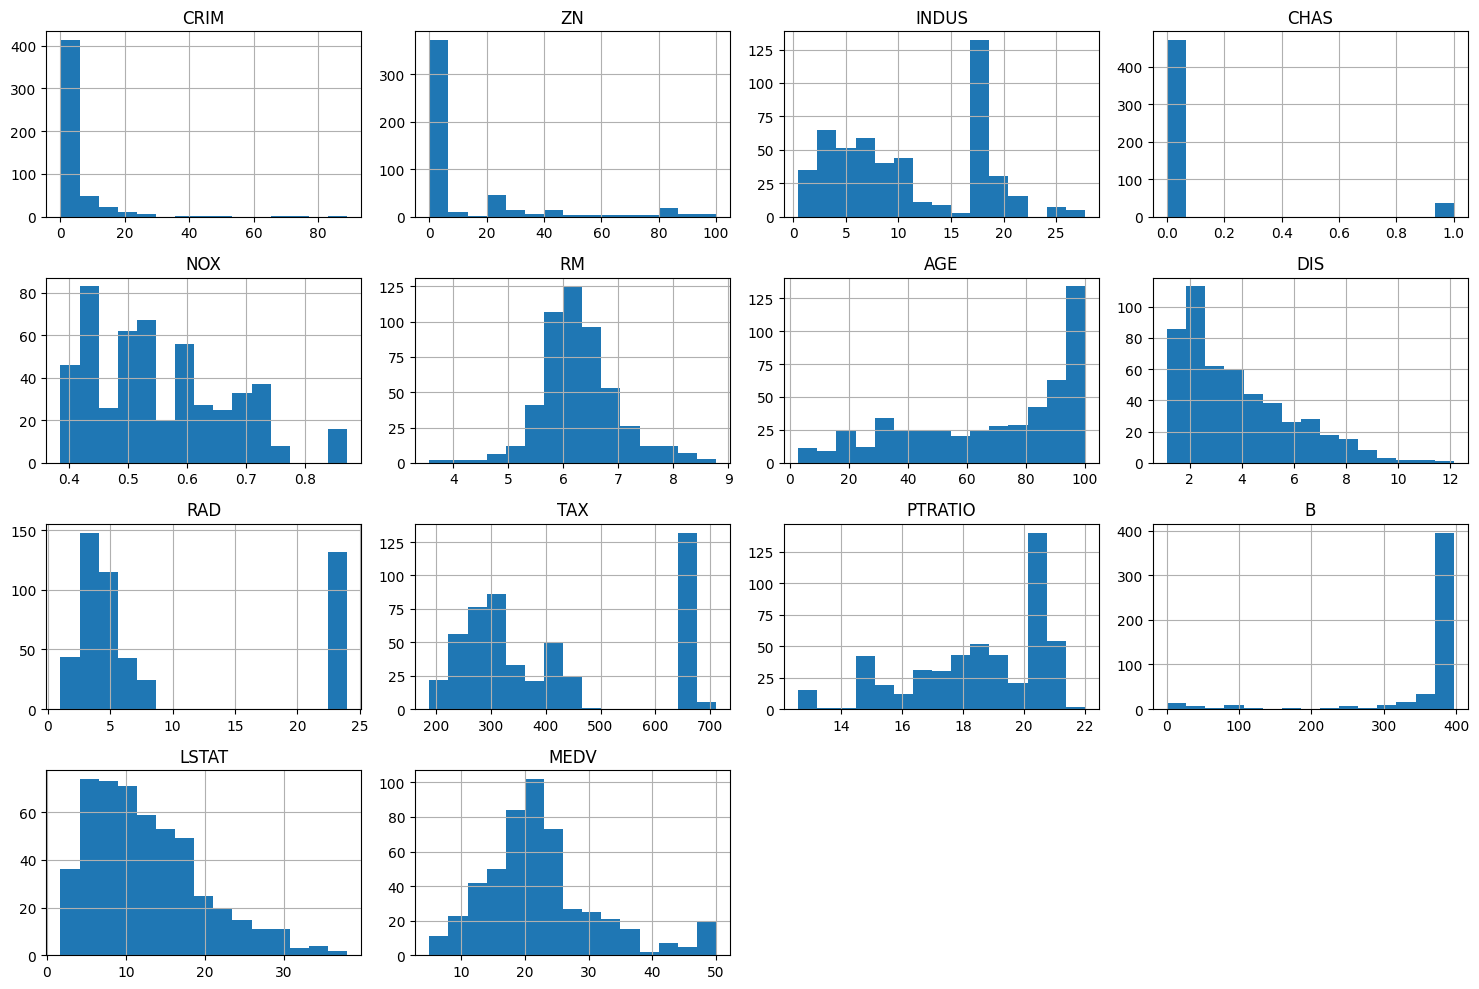

In [9]:
# Histograms for numerical data
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure.
plt.show()

## Data Preprocessing

In [10]:
df_x = df.iloc[:,:-1].values
df_y = df.iloc[:,-1].values
df_y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_val, y_train, y_val = train_test_split(df_x, df_y, test_size=0.20, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50, random_state=SEED)
X_train

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale numerical data
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [12]:
y_test

array([19.4, 22.3, 50. , 34.7, 13.6, 42.3, 13.5, 21.5, 11.3, 21. , 36.2,
       16. , 21.5, 11.8, 34.6, 11.9, 24.3, 20. , 19.6, 19.1, 22. , 15.2,
       18.5, 27.5, 27.1, 19.6, 29.8, 24.3, 10.8, 20.4, 50. , 31.6, 14.4,
       30.5, 13.8, 16.2, 19.8, 26.2, 23.3, 18.7, 10.5, 32.5, 41.7, 19.3,
       46. , 20.5, 43.8, 28. , 36.1, 23.4, 14.5])

## Model Architecture (Lazy Predict)

In [13]:
# All the different regressors
lazypredict.Supervised.REGRESSORS

[('AdaBoostRegressor', sklearn.ensemble._weight_boosting.AdaBoostRegressor),
 ('BaggingRegressor', sklearn.ensemble._bagging.BaggingRegressor),
 ('BayesianRidge', sklearn.linear_model._bayes.BayesianRidge),
 ('DecisionTreeRegressor', sklearn.tree._classes.DecisionTreeRegressor),
 ('DummyRegressor', sklearn.dummy.DummyRegressor),
 ('ElasticNet', sklearn.linear_model._coordinate_descent.ElasticNet),
 ('ElasticNetCV', sklearn.linear_model._coordinate_descent.ElasticNetCV),
 ('ExtraTreeRegressor', sklearn.tree._classes.ExtraTreeRegressor),
 ('ExtraTreesRegressor', sklearn.ensemble._forest.ExtraTreesRegressor),
 ('GammaRegressor', sklearn.linear_model._glm.glm.GammaRegressor),
 ('GaussianProcessRegressor',
  sklearn.gaussian_process._gpr.GaussianProcessRegressor),
 ('GradientBoostingRegressor', sklearn.ensemble._gb.GradientBoostingRegressor),
 ('HistGradientBoostingRegressor',
  sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor),
 ('HuberRegressor', sk

In [14]:
# Choose regressors
#lazypredict.supervised.REGRESSORS = lazypredict.supervised.REGRESSORS[33:36]
#lazypredict.supervised.REGRESSORS

In [15]:
#regressor=['RandomForestRegressor', 'XGBRegressor', 'GradientBoostingRegressor', 'HistGradientBoostingRegressor']
reg = LazyRegressor(verbose=2, ignore_warnings=True, custom_metric=None)

## Model Training

In [16]:
models, predictions = reg.fit(X_train, X_val, y_train, y_val)

  5%|▍         | 2/42 [00:00<00:03, 13.03it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7467941159534819, 'Adjusted R-Squared': 0.6578298864236242, 'RMSE': 3.915427896608706, 'Time taken': 0.09055590629577637}
{'Model': 'BaggingRegressor', 'R-Squared': 0.7940496206943541, 'Adjusted R-Squared': 0.721688676613992, 'RMSE': 3.531210701672706, 'Time taken': 0.06288957595825195}
{'Model': 'BayesianRidge', 'R-Squared': 0.7146994864696182, 'Adjusted R-Squared': 0.6144587654994841, 'RMSE': 4.156172941688035, 'Time taken': 0.006002902984619141}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.6825289278260724, 'Adjusted R-Squared': 0.5709850376028006, 'RMSE': 4.384240940852929, 'Time taken': 0.011010169982910156}
{'Model': 'DummyRegressor', 'R-Squared': -0.015188685595922014, 'Adjusted R-Squared': -0.3718766021566513, 'RMSE': 7.839993783815715, 'Time taken': 0.0039997100830078125}
{'Model': 'ElasticNet', 'R-Squared': 0.6258921118395684, 'Adjusted R-Squared': 0.49444879978320055, 'RMSE': 4.7592746359624325, 'Time taken': 0.0080008506774

 26%|██▌       | 11/42 [00:00<00:01, 18.79it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8039822934056459, 'Adjusted R-Squared': 0.7351112073049269, 'RMSE': 3.4450060246397114, 'Time taken': 0.24716949462890625}
{'Model': 'GammaRegressor', 'R-Squared': 0.6166161907415162, 'Adjusted R-Squared': 0.48191377127231916, 'RMSE': 4.817915935273153, 'Time taken': 0.07732558250427246}
{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.5225882216787192, 'Adjusted R-Squared': 0.3548489482144854, 'RMSE': 5.376366899229914, 'Time taken': 0.03582167625427246}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.806950872086073, 'Adjusted R-Squared': 0.7391228001163148, 'RMSE': 3.418820157808374, 'Time taken': 0.23735952377319336}


 48%|████▊     | 20/42 [00:01<00:01, 17.11it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8307514788246608, 'Adjusted R-Squared': 0.7712857821954876, 'RMSE': 3.201140789297233, 'Time taken': 0.3165111541748047}
{'Model': 'HuberRegressor', 'R-Squared': 0.7384565521244555, 'Adjusted R-Squared': 0.6465629082762911, 'RMSE': 3.9793694018467924, 'Time taken': 0.0110015869140625}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6910379168485417, 'Adjusted R-Squared': 0.5824836714169481, 'RMSE': 4.325087781042772, 'Time taken': 0.01000356674194336}
{'Model': 'KernelRidge', 'R-Squared': -7.1288884562438835, 'Adjusted R-Squared': -9.984984400329571, 'RMSE': 22.184922506914333, 'Time taken': 0.014509916305541992}
{'Model': 'Lars', 'R-Squared': 0.39963882566061804, 'Adjusted R-Squared': 0.18870111575759196, 'RMSE': 6.029046495691767, 'Time taken': 0.013006925582885742}
{'Model': 'LarsCV', 'R-Squared': 0.6495815217880982, 'Adjusted R-Squared': 0.5264615159298625, 'RMSE': 4.606126208714314, 'Time taken': 0.01800227165222168}
{'Mode

 79%|███████▊  | 33/42 [00:01<00:00, 24.63it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.5972402580989216, 'Adjusted R-Squared': 0.45573007851205616, 'RMSE': 4.938162314728462, 'Time taken': 0.3037717342376709}
{'Model': 'NuSVR', 'R-Squared': 0.6813048523010006, 'Adjusted R-Squared': 0.5693308814878386, 'RMSE': 4.392684984106581, 'Time taken': 0.008998870849609375}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.5345662440736004, 'Adjusted R-Squared': 0.37103546496432493, 'RMSE': 5.308493289841336, 'Time taken': 0.004004478454589844}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.697254442197591, 'Adjusted R-Squared': 0.590884381348096, 'RMSE': 4.281354838540814, 'Time taken': 0.013892173767089844}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7413102001198708, 'Adjusted R-Squared': 0.6504191893511768, 'RMSE': 3.9576008109212677, 'Time taken': 0.0040476322174072266}
{'Model': 'PoissonRegressor', 'R-Squared': 0.7344974283330015, 'Adjusted R-Squared': 0.6412127409905426, 'RMSE': 4.009375201960486, 'Time taken':

100%|██████████| 42/42 [00:02<00:00, 16.78it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8013622250172182, 'Adjusted R-Squared': 0.7315705743475922, 'RMSE': 3.46795341409785, 'Time taken': 0.5884754657745361}
{'Model': 'Ridge', 'R-Squared': 0.7129083314136301, 'Adjusted R-Squared': 0.6120382856940947, 'RMSE': 4.169199035580854, 'Time taken': 0.00400090217590332}
{'Model': 'RidgeCV', 'R-Squared': 0.7129083314130756, 'Adjusted R-Squared': 0.6120382856933455, 'RMSE': 4.16919903558488, 'Time taken': 0.0029897689819335938}
{'Model': 'SGDRegressor', 'R-Squared': 0.7162144256588643, 'Adjusted R-Squared': 0.6165059806200869, 'RMSE': 4.145123662768931, 'Time taken': 0.005001544952392578}
{'Model': 'SVR', 'R-Squared': 0.679282650895469, 'Adjusted R-Squared': 0.566598176885769, 'RMSE': 4.4065992957765205, 'Time taken': 0.007995367050170898}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7123687216275993, 'Adjusted R-Squared': 0.6113090832805397, 'RMSE': 4.1731153534331025, 'Time taken': 0.0040128231048583984}
{'Model': 'Tweedi

In [17]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.78,0.83,3.17,0.05
HistGradientBoostingRegressor,0.77,0.83,3.20,0.32
GradientBoostingRegressor,0.74,0.81,3.42,0.24
ExtraTreesRegressor,0.74,0.80,3.45,0.25
RandomForestRegressor,0.73,0.80,3.47,0.59
BaggingRegressor,0.72,0.79,3.53,0.06
XGBRegressor,0.66,0.75,3.88,0.11
AdaBoostRegressor,0.66,0.75,3.92,0.09
PassiveAggressiveRegressor,0.65,0.74,3.96,0.00


## Results

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Extract models from the LazyRegressor/Classifier
fitted_models = reg.models

# Dictionary to store test performance metrics
test_results = {}

# Loop through the models and evaluate them on the test set
for model_name, model in fitted_models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)
    
    # Store the results in the dictionary
    test_results[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# Convert to a DataFrame for easier viewing
import pandas as pd
test_results_df = pd.DataFrame(test_results).T
test_results_df.sort_values(by='R2', ascending=False, inplace=True)

# Display the test results
print(test_results_df)

                                 MSE  RMSE   MAE    R2
GradientBoostingRegressor      10.28  3.21  2.18  0.90
HistGradientBoostingRegressor  11.98  3.46  2.35  0.89
LGBMRegressor                  12.12  3.48  2.30  0.89
XGBRegressor                   12.19  3.49  2.31  0.89
ExtraTreesRegressor            13.64  3.69  2.23  0.87
AdaBoostRegressor              14.17  3.76  2.68  0.87
BaggingRegressor               15.17  3.90  2.72  0.86
RandomForestRegressor          15.51  3.94  2.54  0.85
DecisionTreeRegressor          21.42  4.63  3.17  0.80
ExtraTreeRegressor             23.20  4.82  3.15  0.78
PoissonRegressor               25.29  5.03  2.89  0.76
MLPRegressor                   29.79  5.46  3.46  0.72
LinearRegression               31.09  5.58  3.55  0.71
TransformedTargetRegressor     31.09  5.58  3.55  0.71
LassoLarsCV                    31.09  5.58  3.55  0.71
RidgeCV                        31.13  5.58  3.54  0.71
Ridge                          31.13  5.58  3.54  0.71
LassoCV   